## TSVD - Truncated Singular Value Decomposition
```
FileName: TSVD-v1.ipynb
Creation Date: 12-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedTSVD.gzip
Runtime: 20 mins
Description: Reduce Features.  from TSVD we derive top Feature list; note data is transformed here
             but we are throwing away this data and using original data; Next top columns from 
             Test file is used to create a new Test file
Version:
    v1: 12-Jul-2018: Initial Version
```

In [37]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
import datetime

In [38]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-12 08:56:08


In [39]:
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3"# Train
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test -- do not generate this here use feature reduction code
trainOrTestFlag = "Test"
retainVariance = 0.95 # Retain 95% of variance (Used for Train)

In [40]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [41]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [42]:
x_data = df.drop('label',axis=1)
y_labels = df['label'].values

In [43]:
x_data.shape

(206665, 577)

In [44]:
y_labels.shape

(206665,)

In [45]:
y_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.00001,random_state=101) # 71351729)

In [47]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()
# scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.MaxAbsScaler()
# scaler = sklearn.preprocessing.QuantileTransformer()
# scaler = sklearn.preprocessing.Normalizer()

In [48]:
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


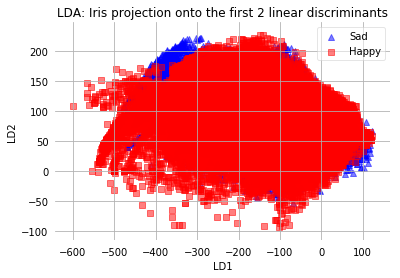

In [49]:
plot_step_lda(x_data.as_matrix(columns=None), y_labels)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


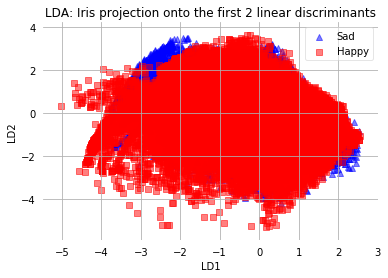

In [50]:
plot_step_lda(X_train.as_matrix(columns=None), y_train)

In [51]:
# Make sparse matrix 
features_sparse = csr_matrix(X_train)

In [52]:
# Create a function
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0 
    # Set initial number of features 
    n_components = 0 
    # For the explained variance of each feature: 
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components 
        n_components += 1 
        # If we reach our goal level of explained variance 
        if total_variance >= goal_var: 
            # End the loop
            break 
    # Return the number of components
    return n_components

In [53]:
# uses retainVariance
def getFeatCount(retainVariance):
    # Create and run an TSVD with one less than number of features
    tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
    features_tsvd = tsvd.fit(features_sparse)
    
    # List of explained variances
    tsvd_var_ratios = tsvd.explained_variance_ratio_
    
    # Run function 
    n_feats = select_n_components(tsvd_var_ratios, retainVariance)
    print("Number of Features:", n_feats)
    
    return(n_feats)

In [54]:
n_feats = getFeatCount(retainVariance)

Number of Features: 178


In [55]:
print("Number of Features to be used:", n_feats)

Number of Features to be used: 178


In [56]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=n_feats)

In [57]:
# Conduct TSVD on sparse matrix 
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

In [58]:
plot_step_lda(features_sparse_tsvd, y_train)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [59]:
tsvd.components_.shape

(178, 577)

In [60]:
loading_scores = pd.Series(tsvd.components_[0])
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_feats = sorted_loading_scores[0:n_feats].index.values
top_feats

array([415, 347, 346, 416, 444, 356, 390, 383, 410, 414, 454, 405, 391,
       453, 480, 337, 384, 443, 336, 381, 434, 469, 357, 358, 394, 304,
       440, 345, 397, 370, 427, 428, 372, 324, 398, 341, 393, 402, 373,
       468, 476, 446, 197, 433, 479, 417, 423, 488, 353, 368, 467, 429,
       409, 310, 196, 288, 463, 371, 426, 478, 359, 275, 432, 420, 382,
       406, 445, 477, 330, 305, 462, 459, 385, 431, 369, 401, 380, 455,
       466, 465, 481, 418, 367, 389, 450, 313, 512, 195, 438, 422, 379,
       248, 198, 366, 456, 335, 299, 513, 482, 439, 489, 344, 323, 502,
       276, 407, 311, 327, 460, 487, 496, 200, 403, 362, 374, 490, 499,
       355, 329, 514, 419, 392, 312, 360, 461, 475, 447, 295, 396, 494,
       282, 495, 348, 408, 326, 354, 399, 331, 194, 199, 442, 437, 507,
       404, 270, 497, 349, 470, 361, 294, 325, 530, 421, 501, 457, 328,
       338, 300, 525, 319, 493, 377, 249, 506, 441, 340, 413, 320, 451,
       500, 486, 531, 498, 287, 318, 435, 449, 292], dtype=int64

In [61]:
loading_scores[top_feats][:10]

415    0.061801
347    0.060763
346    0.060633
416    0.060278
444    0.060071
356    0.059834
390    0.059671
383    0.059643
410    0.059601
414    0.059438
dtype: float64

In [62]:
newHeadList = ["f" + str(i) for i in top_feats]

In [63]:
newHeadList.append("label")

In [64]:
newDF = df.copy()

In [65]:
oldHeadList = newDF.columns
oldHeadList

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576',
       'label'],
      dtype='object', length=578)

In [66]:
dropColList = [x for x in oldHeadList if x not in newHeadList]

In [67]:
newDF = newDF.drop(labels=dropColList, axis=1)

In [68]:
newDF.columns

Index(['f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f248', 'f249',
       'f270',
       ...
       'f502', 'f506', 'f507', 'f512', 'f513', 'f514', 'f525', 'f530', 'f531',
       'label'],
      dtype='object', length=179)

In [70]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedTSVD" + str(n_feats) + ".gzip"), sep=",", index=False, 
             header=newDF.columns, compression='gzip')

In [ ]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))